In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Анализ исходных данных

In [4]:
abalone_df = pd.read_csv('abalone.csv')

In [15]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
abalone_df['Sex'] = abalone_df['Sex'].apply(lambda x: 1 if x == 'M' else 0)

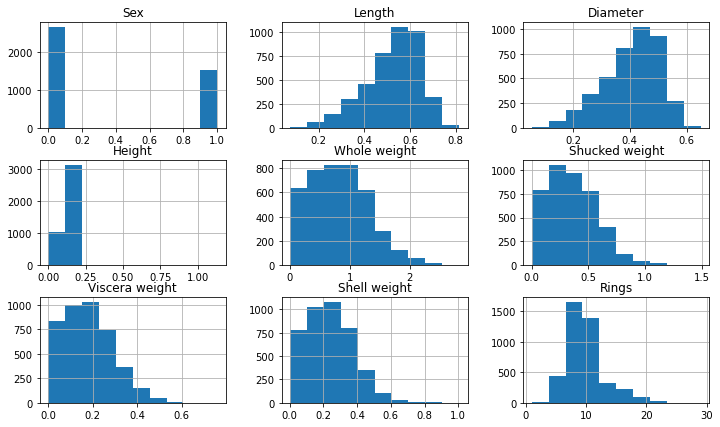

In [21]:
abalone_df.hist(bins=10, figsize=(12, 7));

In [22]:
corr = abalone_df.corr()

In [23]:
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.236543,0.240376,0.215459,0.252038,0.251793,0.242194,0.235391,0.181831
Length,0.236543,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.240376,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.215459,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.252038,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.251793,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.242194,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.235391,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.181831,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [24]:
from sklearn.model_selection import train_test_split

X, y = abalone_df.drop(columns=['Rings']), abalone_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Обучение моделей

In [35]:
from sklearn.linear_model import *
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
lr_lasso = Lasso(alpha=0.1)
lr_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

rf_regr = RandomForestRegressor(n_estimators=200, random_state=0)
cb_regr = CatBoostRegressor(iterations=200, logging_level = 'Silent')

rf_regr.fit(X_train,y_train)
cb_regr.fit(X_train,y_train)

# Метрики моделей на тесте

In [37]:
from sklearn.metrics import *

In [38]:
predictions = lr.predict(X_test)
mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(4.919440287993311, 1.6231849357264936, 0.5145718913017863)

In [39]:
predictions = lr_ridge.predict(X_test)
mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(4.925238233028954, 1.628559505348845, 0.5139997763195479)

In [40]:
predictions = lr_lasso.predict(X_test)
mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(7.128014851527164, 1.992400279652848, 0.2966397464779402)

In [41]:
predictions = rf_regr.predict(X_test)
mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(4.861367639593908, 1.5697353154459752, 0.5203022374853594)

In [34]:
predictions = cb_regr.predict(X_test)
mean_squared_error(y_test, predictions), mean_absolute_error(y_test, predictions), r2_score(y_test, predictions)

(4.852180868909966, 1.5742419259540126, 0.5212087464492011)